In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import mannwhitneyu
from scipy.stats import normaltest

In [2]:
df_clean = pd.read_csv('churn_cleaned.csv')
df_clean

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges  Churn  
0            29.85      0  
1          1889.50      0  
2           108.15      1  
3          1840.75      0  
4           151.65      1  
...            ...    ...  
7038       1990.50      0  
7039       7362.90      0  
7040        346.45      0  
7041        306.60      1  
7042       6844.50      0  

[7043 rows x 20 columns]

In [3]:
df_perc = df_clean.Churn.value_counts(normalize=True).to_frame()
df_perc

Churn
0  0.73463
1  0.26537

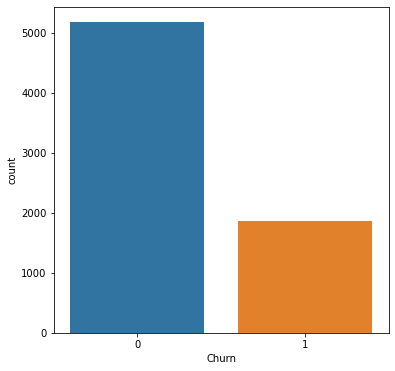

In [89]:
plt.figure(figsize=(6,6))
sns.countplot(x='Churn',data=df_clean)
plt.savefig('1.png')
plt.show()

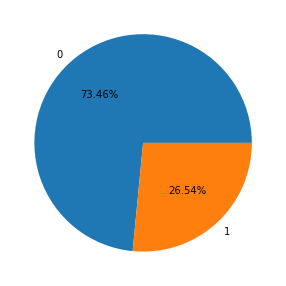

In [86]:
plt.figure(figsize=(10,5))
plt.pie(df_perc['Churn'], labels=df_perc.index,
       autopct='%.2f%%')
plt.show()

### Dari Pie Chart diatas ternyata lebih banyak customer yang tidak churn dibanding yang churn. ini menandakan dataset yang digunakan mengalami imbalance sehingga dapat dilakukan metode resampling pada tahap modelling

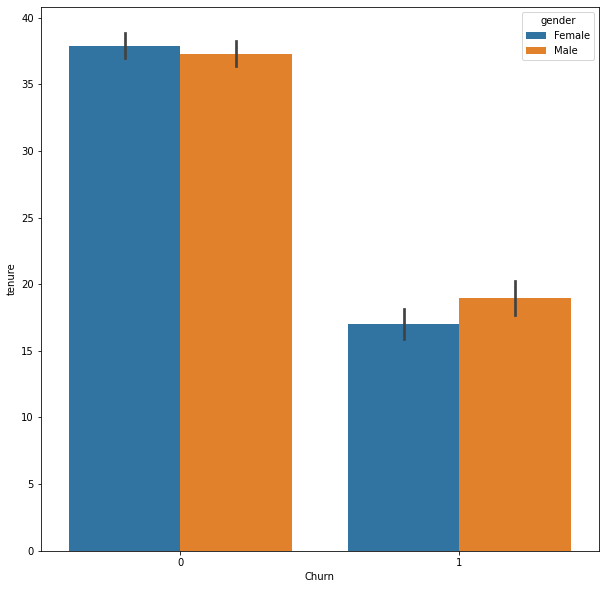

In [90]:
plt.figure(figsize=(10,10))
sns.barplot(x='Churn', y='tenure', data=df_clean, hue='gender')
plt.savefig('2.png')
plt.show()

### Dari barplot diatas saya memiliki hipotesis bahwa customer yang churn cenderung memiliki waktu berlangganan yang lebih singkat dibanding customer yang tidak churn

### Check for normal distribution

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

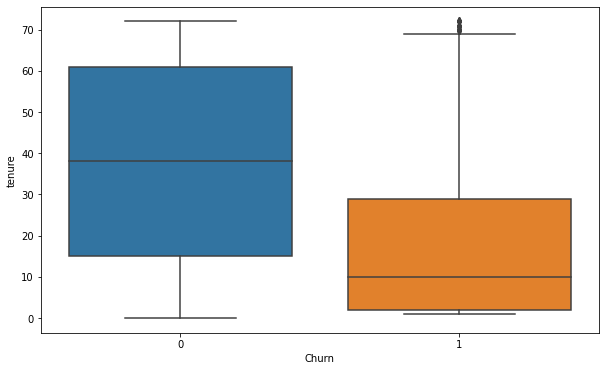

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df_clean)

### Dapat dilihat dari boxplot diatas bahwa distribusi waktu berlangganan customer yang churn tidak normal sehingga dilakukan hypotesis testing non parametric

In [7]:
stats, p = mannwhitneyu(df_clean[df_clean['Churn'] == 1]['tenure'], df_clean[df_clean['Churn'] == 0]['tenure'], alternative='less')

if p < 0.05:
    print('Churn Customer has less median tenure than Not Churn Customer')
else:
    print('Churn Customer has equal median tenure than Not Churn Customer')

Churn Customer has less median tenure than Not Churn Customer


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang churn cenderung memiliki waktu berlangganan yang lebih singkat dibanding customer yang tidak churn

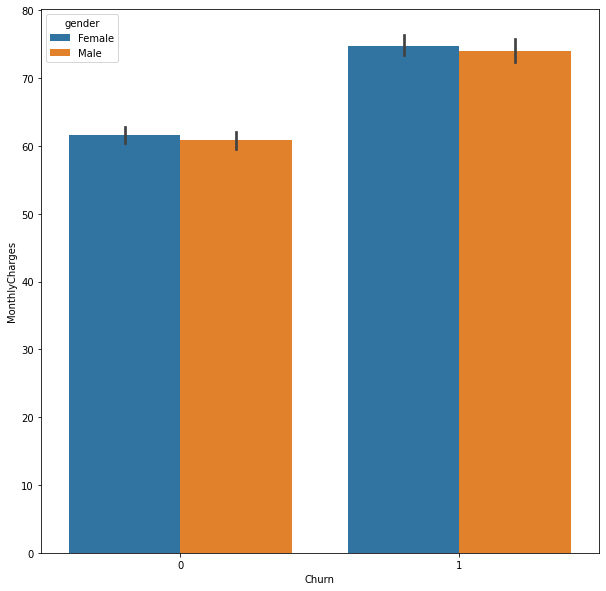

In [91]:
plt.figure(figsize=(10,10))
sns.barplot(x='Churn', y='MonthlyCharges', data=df_clean, hue='gender')
plt.savefig('3.png')
plt.show()

### Dari barplot diatas saya memiliki hipotesis bahwa customer yang tidak churn cenderung memiliki tagihan per bulan yang lebih sedikit dibanding customer yang churn

### Check for normal distribution

In [9]:
gstat, p2 = normaltest(df_clean[df_clean['Churn'] == 0]['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 0.0
The null hypothesis can be rejected / Data tidak normal


In [10]:
gstat, p2 = normaltest(df_clean[df_clean['Churn'] == 1]['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 2.1751097809888962e-33
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi tagihan per bulan customer yang churn dan tidak churn tidak normal maka dilakukan hypotesis testing non parametric

In [11]:
stats, p = mannwhitneyu(df_clean[df_clean['Churn'] == 0]['MonthlyCharges'], df_clean[df_clean['Churn'] == 1]['MonthlyCharges'], alternative='less')

if p < 0.05:
    print('Not Churn Customer has less median monthly charges than Churn Customer')
else:
    print('Not Churn Customer has equal median monthly charges than Churn Customer')

Not Churn Customer has less median monthly charges than Churn Customer


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak churn cenderung memiliki tagihan per bulan yang lebih sedikit dibanding customer yang churn

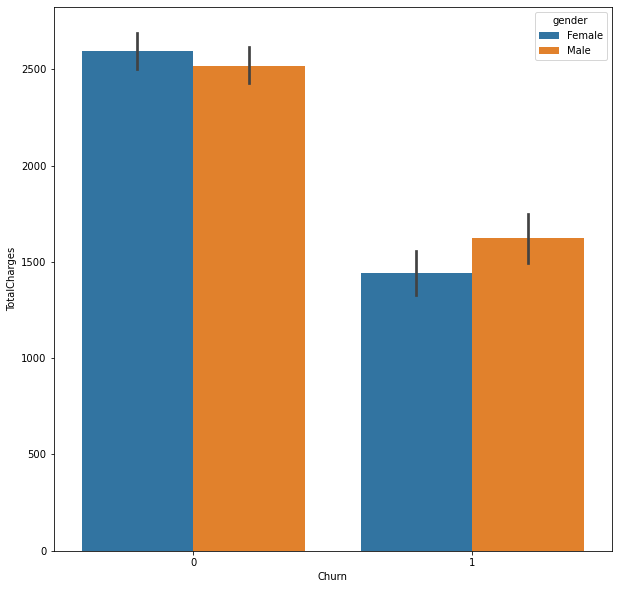

In [92]:
plt.figure(figsize=(10,10))
sns.barplot(x='Churn', y='TotalCharges', data=df_clean, hue='gender')
plt.savefig('4.png')
plt.show()

### Dari barplot diatas saya memiliki hipotesis bahwa customer yang churn cenderung memiliki total tagihan yang lebih sedikit dibanding customer yang tidak churn

### Check for normal distribution

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

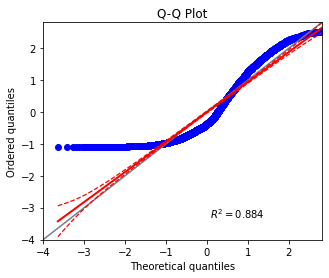

In [13]:
pg.qqplot(df_clean[df_clean['Churn'] == 0]['TotalCharges'], dist='norm')

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

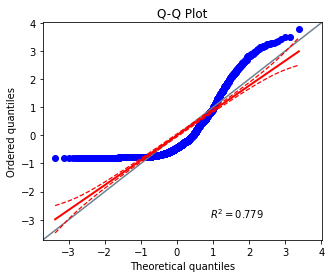

In [14]:
pg.qqplot(df_clean[df_clean['Churn'] == 1]['TotalCharges'], dist='norm')

### Dapat dilihat dari qqplot diatas bahwa distribusi total tagihan customer yang churn dan tidak churn tidak normal sehingga dilakukan hypotesis testing non parametric

In [15]:
stats, p = mannwhitneyu(df_clean[df_clean['Churn'] == 1]['TotalCharges'], df_clean[df_clean['Churn'] == 0]['TotalCharges'], alternative='less')

if p < 0.05:
    print('Churn Customer has less median total charges than Not Churn Customer')
else:
    print('Churn Customer has equal median total charges than Not Churn Customer')

Churn Customer has less median total charges than Not Churn Customer


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang churn cenderung memiliki total tagihan yang lebih sedikit dibanding customer yang tidak churn

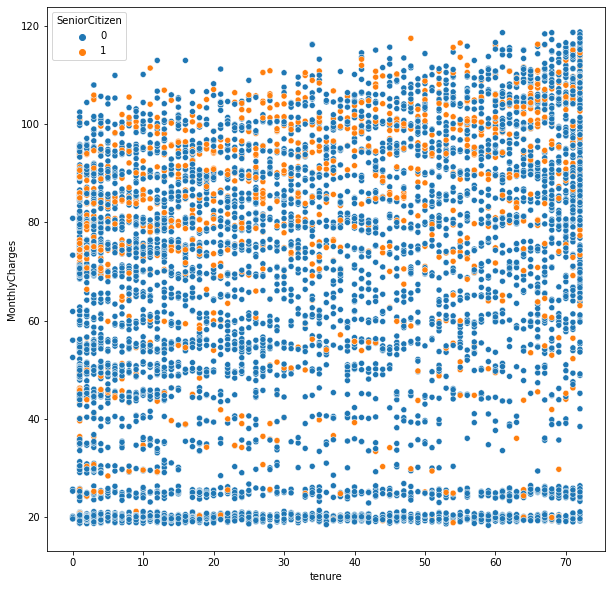

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='SeniorCitizen')
plt.show()

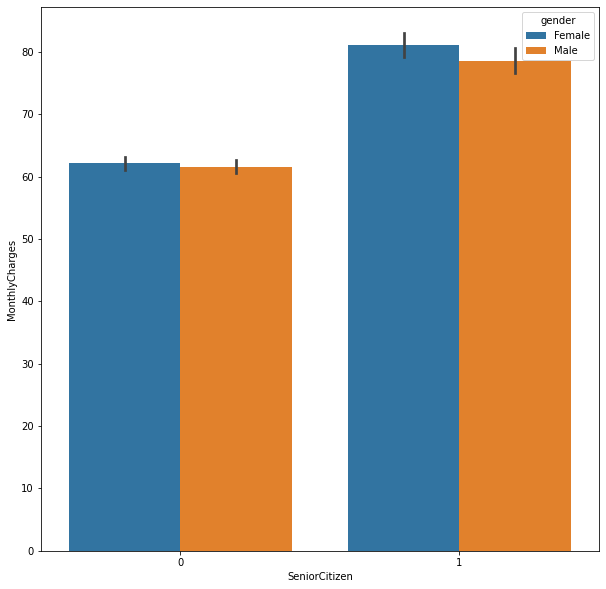

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x='SeniorCitizen', y='MonthlyCharges', data=df_clean, hue='gender')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang lebih muda cenderung memiliki tagihan per bulan yang lebih sedikit dibanding customer yang lebih tua

### Check for normal distribution

In [18]:
gstat, p2 = normaltest(df_clean[df_clean['SeniorCitizen'] == 0]['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 0.0
The null hypothesis can be rejected / Data tidak normal


In [19]:
gstat, p2 = normaltest(df_clean[df_clean['SeniorCitizen'] == 1]['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 1.173259909823456e-26
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi tagihan per bulan customer muda dan tua tidak normal maka dilakukan hypotesis testing non parametric

In [20]:
stats, p = mannwhitneyu(df_clean[df_clean['SeniorCitizen'] == 0]['MonthlyCharges'], df_clean[df_clean['SeniorCitizen'] == 1]['MonthlyCharges'], alternative='less')

if p < 0.05:
    print('Younger Customer has less median monthly charges than Older Customer')
else:
    print('Younger Customer has equal median monthly charges than Older Customer')

Younger Customer has less median monthly charges than Older Customer


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang lebih muda cenderung memiliki tagihan per bulan yang lebih sedikit dibanding customer yang lebih tua

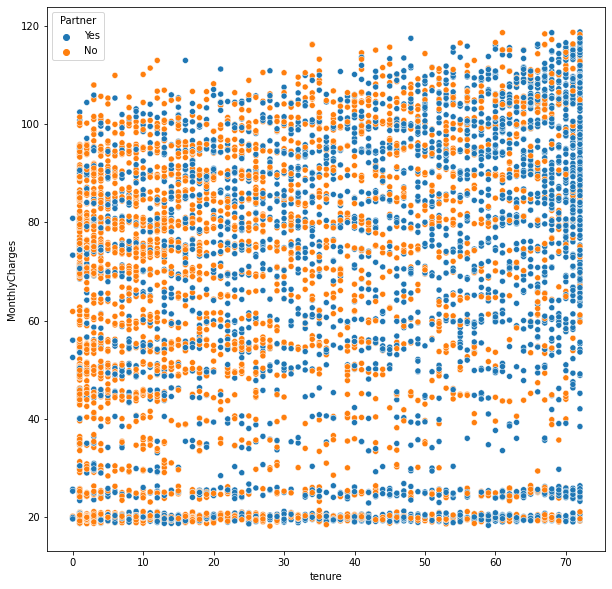

In [93]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='Partner')
plt.savefig('5a.png')
plt.show()

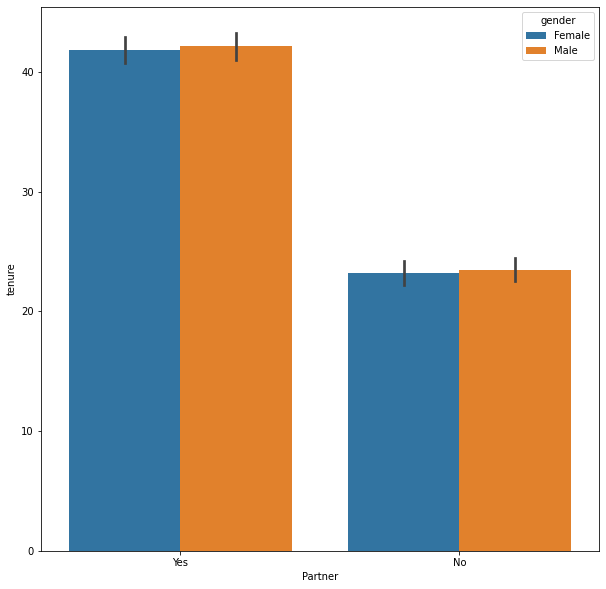

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(x='Partner', y='tenure', data=df_clean, hue='gender')
plt.savefig('5b.png')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang tidak memiliki pasangan cenderung memiliki waktu berlangganan yang lebih singkat dibanding customer yang memiliki pasangan

### Check for normal distibution

In [23]:
gstat, p2 = normaltest(df_clean[df_clean['Partner'] == 'No']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 2.2285471097559534e-103
The null hypothesis can be rejected / Data tidak normal


In [24]:
gstat, p2 = normaltest(df_clean[df_clean['Partner'] == 'Yes']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 0.0
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi waktu berlangganan customer yang memiliki pasangan dan tidak memiliki pasangan tidak normal maka dilakukan hypotesis testing non parametric

In [25]:
stats, p = mannwhitneyu(df_clean[df_clean['Partner'] == 'No']['tenure'], df_clean[df_clean['Partner'] == 'Yes']['tenure'], alternative='less')

if p < 0.05:
    print('Customer who dont have partner has less median tenure than Customer who have partner')
else:
    print('Customer who dont have partner has equal median tenure than Customer who have partner')

Customer who dont have partner has less median tenure than Customer who have partner


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak memiliki pasangan cenderung memiliki waktu berlangganan yang lebih singkat dibanding customer yang memiliki pasangan

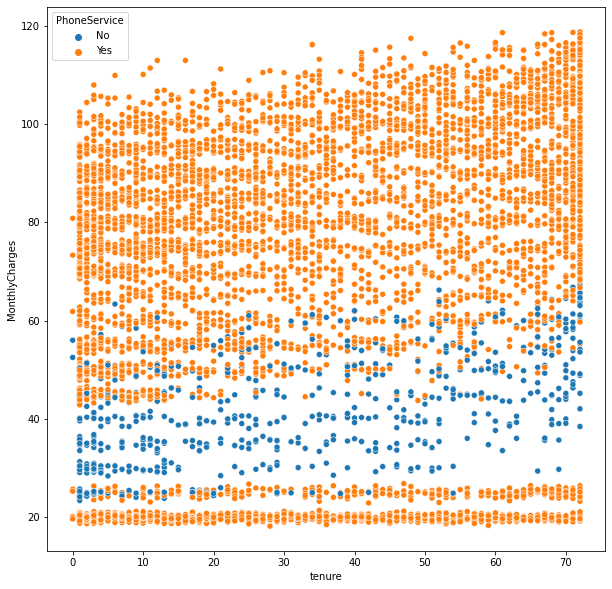

In [95]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='PhoneService')
plt.savefig('6.png')
plt.show()

### Dapat dilihat dari scatter plot diatas bahwa hampir semua customer yang memiliki tagihan per bulan sekitar 20 atau tagihan per bulan diatas 60 memiliki phone service

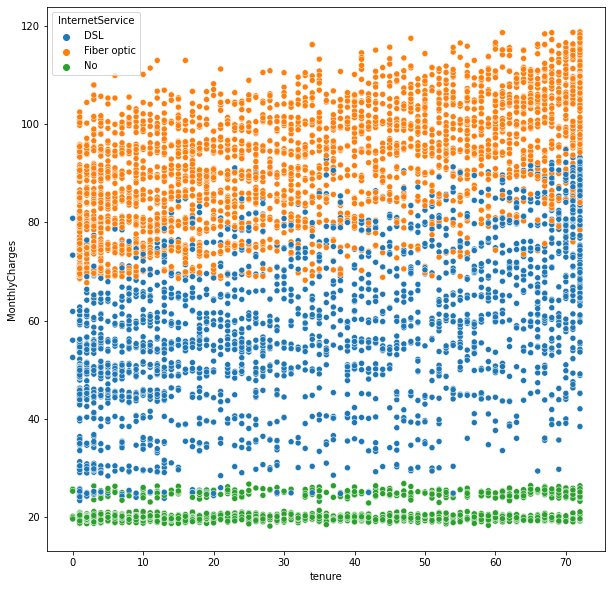

In [97]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='InternetService')
plt.savefig('7.png')
plt.show()

### Dapat dilihat dari scatter plot diatas bahwa hampir semua customer yang tidak memiliki internet service memiliki tagihan per bulan yang paling rendah dibandingkan dengan customer yang memiliki internet service

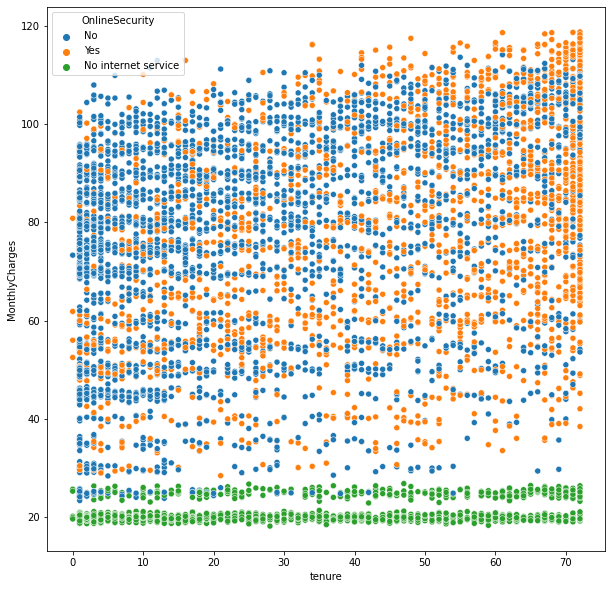

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='OnlineSecurity')
plt.show()

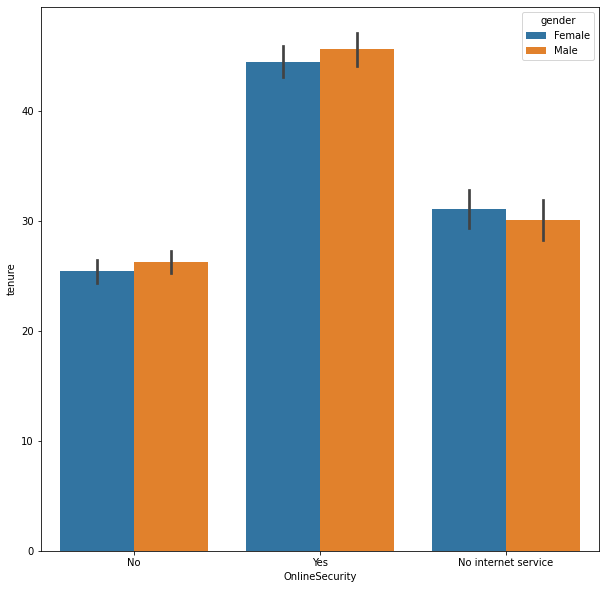

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x='OnlineSecurity', y='tenure', data=df_clean, hue='gender')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang tidak menggunakan layanan online security cenderung memiliki waktu berlangganan yang lebih singkat dibanding customer yang menggunakan layanan online security

### Check for normal distribution

In [30]:
gstat, p2 = normaltest(df_clean[df_clean['OnlineSecurity'] == 'No']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 2.7590107186929854e-192
The null hypothesis can be rejected / Data tidak normal


In [31]:
gstat, p2 = normaltest(df_clean[df_clean['OnlineSecurity'] == 'Yes']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 1.432112611350928e-290
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi waktu berlangganan customer yang menggunakan layanan online security dan tidak menggunakan layanan online security tidak normal maka dilakukan hypotesis testing non parametric

In [32]:
stats, p = mannwhitneyu(df_clean[df_clean['OnlineSecurity'] == 'No']['tenure'], df_clean[df_clean['OnlineSecurity'] == 'Yes']['tenure'], alternative='less')

if p < 0.05:
    print('Customer who dont have online security has less median tenure than Customer who have online security')
else:
    print('Customer who dont have online security has equal median tenure than Customer who have online security')

Customer who dont have online security has less median tenure than Customer who have online security


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak menggunakan layanan online security memiliki waktu berlangganan yang lebih singkat dibanding customer yang menggunakan layanan online security

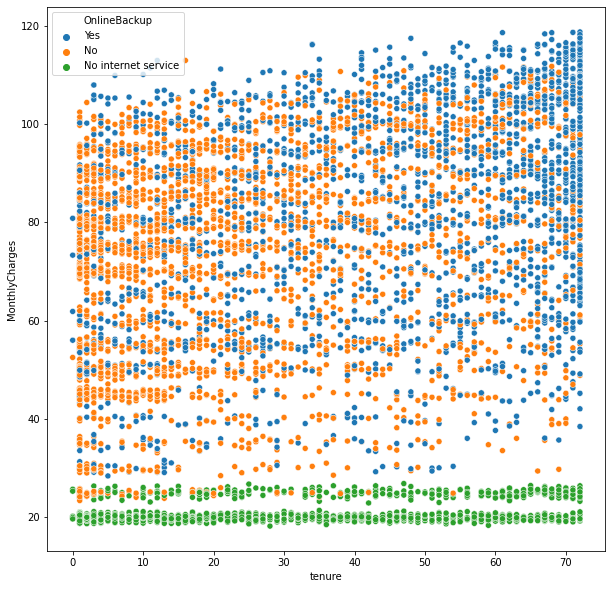

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='OnlineBackup')
plt.show()

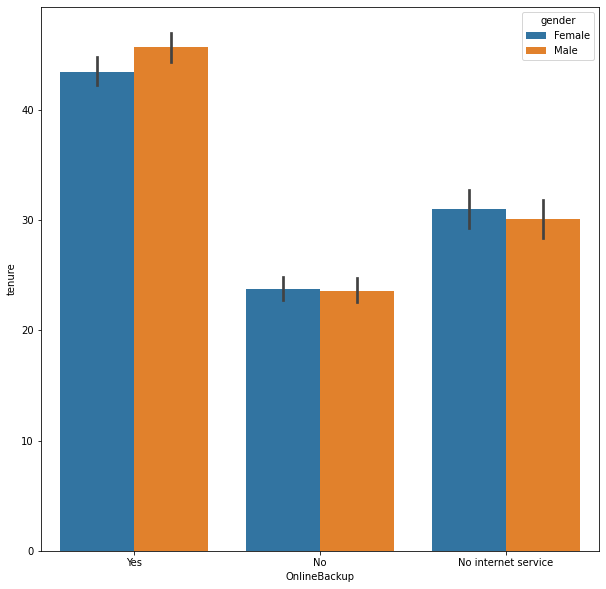

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(x='OnlineBackup', y='tenure', data=df_clean, hue='gender')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang tidak menggunakan layanan online backup cenderung memiliki waktu berlangganan yang lebih singkat dibanding customer yang menggunakan layanan online backup

### Check for normal distribution

In [35]:
gstat, p2 = normaltest(df_clean[df_clean['OnlineBackup'] == 'No']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 1.1886389468066357e-84
The null hypothesis can be rejected / Data tidak normal


In [36]:
gstat, p2 = normaltest(df_clean[df_clean['OnlineBackup'] == 'Yes']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 0.0
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi waktu berlangganan customer yang menggunakan layanan online backup dan tidak menggunakan layanan online backup tidak normal maka dilakukan hypotesis testing non parametric

In [37]:
stats, p = mannwhitneyu(df_clean[df_clean['OnlineBackup'] == 'No']['tenure'], df_clean[df_clean['OnlineBackup'] == 'Yes']['tenure'], alternative='less')

if p < 0.05:
    print('Customer who dont have online backup has less median tenure than Customer who have online backup')
else:
    print('Customer who dont have online backup has equal median tenure than Customer who have online backup')

Customer who dont have online backup has less median tenure than Customer who have online backup


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak menggunakan layanan online backup memiliki waktu berlangganan yang lebih singkat dibanding customer yang menggunakan layanan online backup

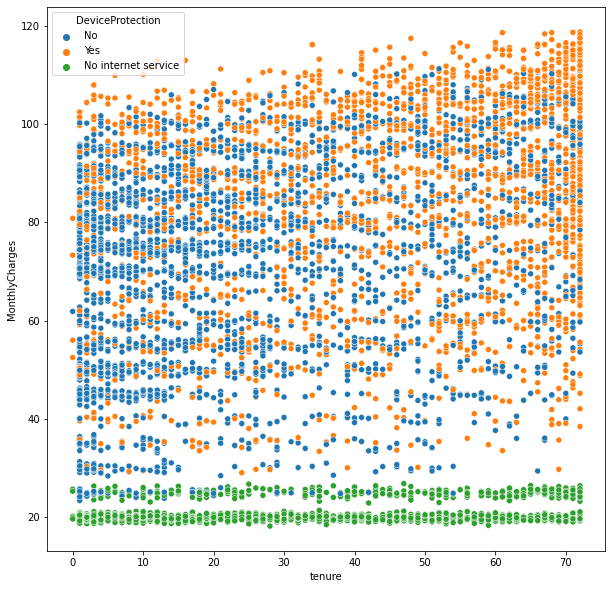

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='DeviceProtection')
plt.show()

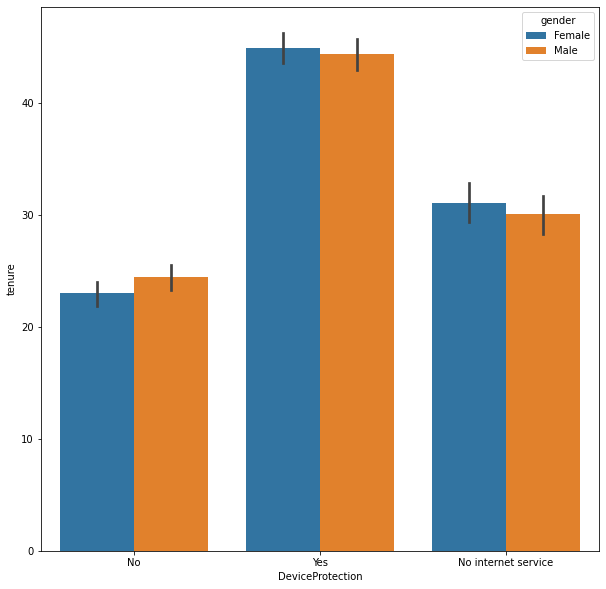

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x='DeviceProtection', y='tenure', data=df_clean, hue='gender')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang tidak menggunakan layanan device protection cenderung memiliki waktu berlangganan yang lebih singkat dibanding customer yang menggunakan layanan device protection

### Check for normal distribution

In [40]:
gstat, p2 = normaltest(df_clean[df_clean['DeviceProtection'] == 'No']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 6.86466451682265e-92
The null hypothesis can be rejected / Data tidak normal


In [41]:
gstat, p2 = normaltest(df_clean[df_clean['DeviceProtection'] == 'Yes']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 0.0
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi waktu berlangganan customer yang menggunakan layanan device protection dan tidak menggunakan layanan device protection tidak normal maka dilakukan hypotesis testing non parametric

In [42]:
stats, p = mannwhitneyu(df_clean[df_clean['DeviceProtection'] == 'No']['tenure'], df_clean[df_clean['DeviceProtection'] == 'Yes']['tenure'], alternative='less')

if p < 0.05:
    print('Customer who dont have device protection has less median tenure than Customer who have device protection')
else:
    print('Customer who dont have device protection has equal median tenure than Customer who have device protection')

Customer who dont have device protection has less median tenure than Customer who have device protection


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak menggunakan layanan device protection memiliki waktu berlangganan yang lebih singkat dibanding customer yang menggunakan layanan device protection

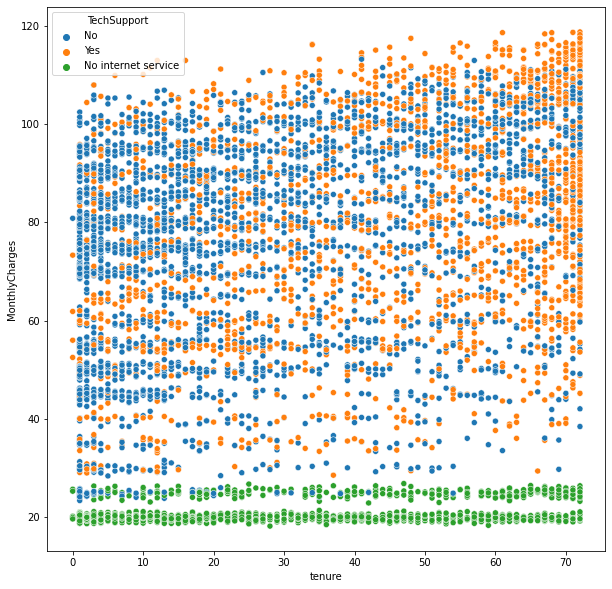

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='TechSupport')
plt.show()

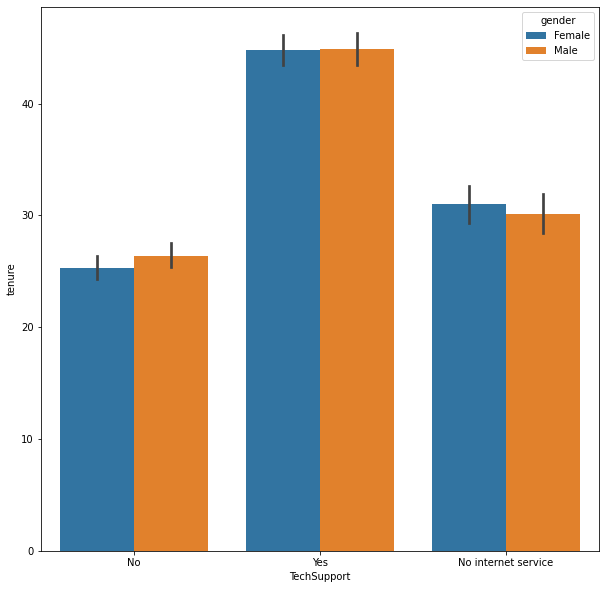

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x='TechSupport', y='tenure', data=df_clean, hue='gender')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang tidak menggunakan layanan tech support cenderung memiliki waktu berlangganan yang lebih singkat dibanding customer yang menggunakan layanan tech support

### Check for normal distribution

In [45]:
gstat, p2 = normaltest(df_clean[df_clean['TechSupport'] == 'No']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 1.1287447468775647e-198
The null hypothesis can be rejected / Data tidak normal


In [46]:
gstat, p2 = normaltest(df_clean[df_clean['TechSupport'] == 'Yes']['tenure'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 0.0
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi waktu berlangganan customer yang menggunakan layanan tech support dan tidak menggunakan layanan tech support tidak normal maka dilakukan hypotesis testing non parametric

In [47]:
stats, p = mannwhitneyu(df_clean[df_clean['TechSupport'] == 'No']['tenure'], df_clean[df_clean['TechSupport'] == 'Yes']['tenure'], alternative='less')

if p < 0.05:
    print('Customer who dont have tech support has less median tenure than Customer who have tech support')
else:
    print('Customer who dont have tech support has equal median tenure than Customer who have tech support')

Customer who dont have tech support has less median tenure than Customer who have tech support


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak menggunakan layanan tech support memiliki waktu berlangganan yang lebih singkat dibanding customer yang menggunakan layanan tech support

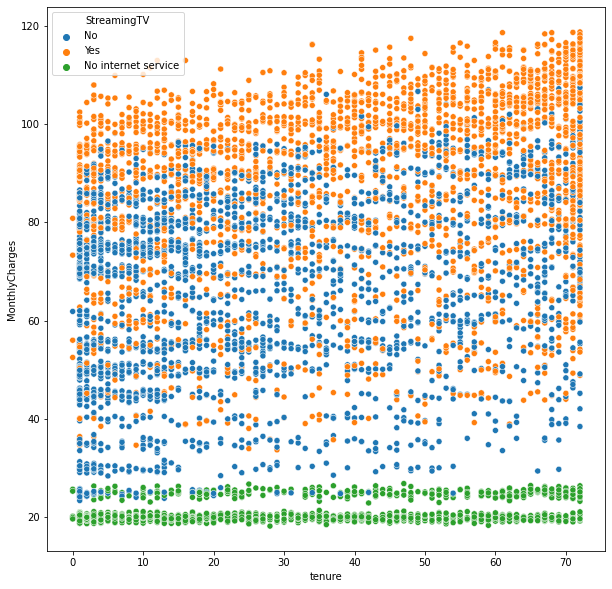

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='StreamingTV')
plt.show()

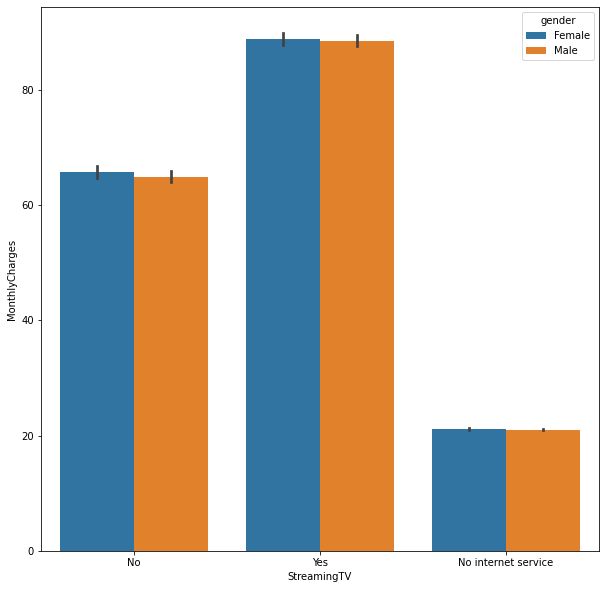

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(x='StreamingTV', y='MonthlyCharges', data=df_clean, hue='gender')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang tidak menggunakan layanan streaming tv cenderung memiliki tagihan per bulan yang lebih rendah dibanding customer yang menggunakan layanan streaming tv

### Check for normal distribution

In [50]:
gstat, p2 = normaltest(df_clean[df_clean['StreamingTV'] == 'No']['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 1.4946541980350162e-46
The null hypothesis can be rejected / Data tidak normal


In [51]:
gstat, p2 = normaltest(df_clean[df_clean['StreamingTV'] == 'Yes']['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 1.4466436875768802e-51
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi tagihan per bulan customer yang menggunakan layanan streaming tv dan tidak menggunakan layanan streaming tv tidak normal maka dilakukan hypotesis testing non parametric

In [52]:
stats, p = mannwhitneyu(df_clean[df_clean['StreamingTV'] == 'No']['MonthlyCharges'], df_clean[df_clean['StreamingTV'] == 'Yes']['MonthlyCharges'], alternative='less')

if p < 0.05:
    print('Customer who dont have streaming tv has less median monthly charges than Customer who have streaming tv')
else:
    print('Customer who dont have streaming tv has equal median monthly charges than Customer who have streaming tv')

Customer who dont have streaming tv has less median monthly charges than Customer who have streaming tv


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak menggunakan layanan streaming tv memiliki tagihan per bulan yang lebih rendah dibanding customer yang menggunakan layanan streaming tv

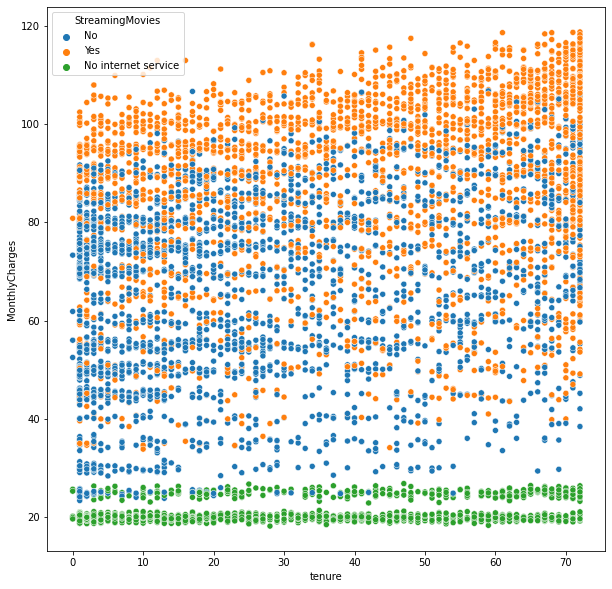

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='StreamingMovies')
plt.show()

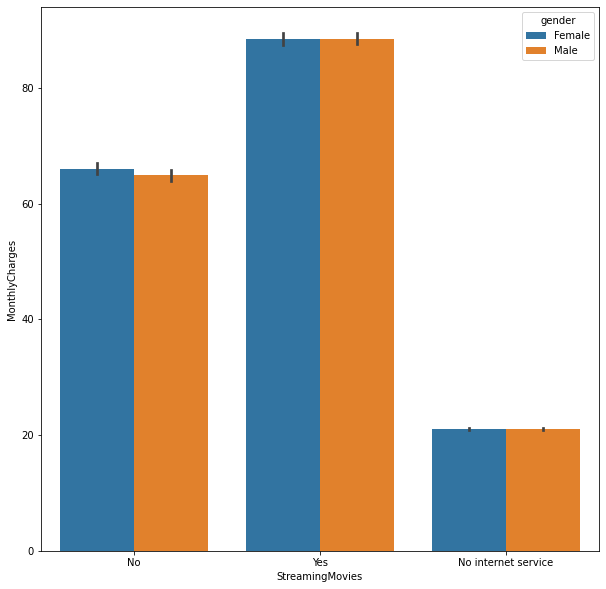

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(x='StreamingMovies', y='MonthlyCharges', data=df_clean, hue='gender')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang tidak menggunakan layanan streaming movies cenderung memiliki tagihan per bulan yang lebih rendah dibanding customer yang menggunakan layanan streaming movies

### Check for normal distribution

In [55]:
gstat, p2 = normaltest(df_clean[df_clean['StreamingMovies'] == 'No']['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 1.3982406813870235e-45
The null hypothesis can be rejected / Data tidak normal


In [56]:
gstat, p2 = normaltest(df_clean[df_clean['StreamingMovies'] == 'Yes']['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 6.1158576167819875e-52
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi tagihan per bulan customer yang menggunakan layanan streaming movies dan tidak menggunakan layanan streaming movies tidak normal maka dilakukan hypotesis testing non parametric

In [57]:
stats, p = mannwhitneyu(df_clean[df_clean['StreamingMovies'] == 'No']['MonthlyCharges'], df_clean[df_clean['StreamingMovies'] == 'Yes']['MonthlyCharges'], alternative='less')

if p < 0.05:
    print('Customer who dont have streaming movie has less median monthly charges than Customer who have streaming movie')
else:
    print('Customer who dont have streaming movie has equal median monthly charges than Customer who have streaming movie')

Customer who dont have streaming movie has less median monthly charges than Customer who have streaming movie


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak menggunakan layanan streaming movie memiliki tagihan per bulan yang lebih rendah dibanding customer yang menggunakan layanan streaming movie

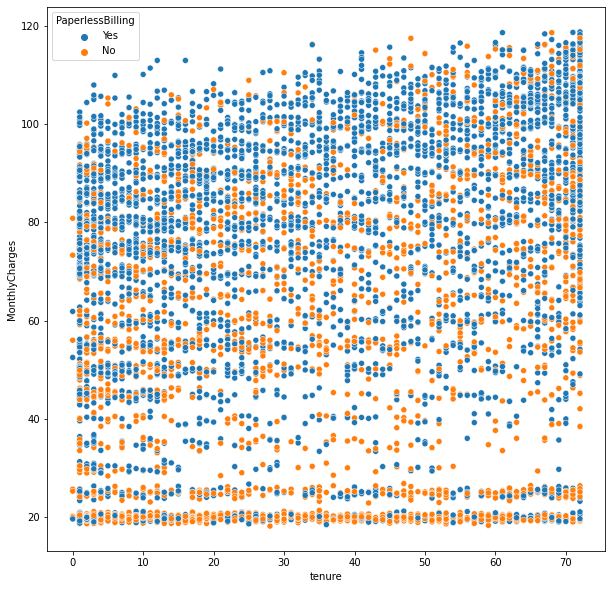

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='PaperlessBilling')
plt.show()

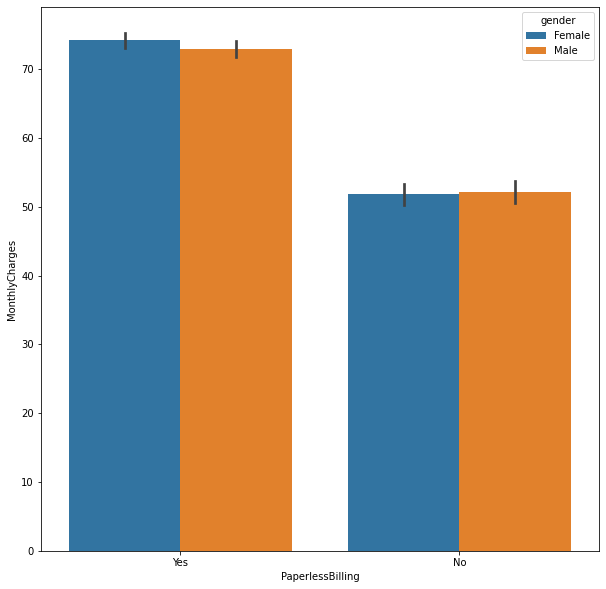

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(x='PaperlessBilling', y='MonthlyCharges', data=df_clean, hue='gender')
plt.show()

### Dari plot diatas saya memiliki hipotesis bahwa customer yang tidak menggunakan paperless billing cenderung memiliki tagihan per bulan yang lebih rendah dibanding customer yang menggunakan paperless billing

### Check for normal distribution

In [60]:
gstat, p2 = normaltest(df_clean[df_clean['PaperlessBilling'] == 'No']['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 0.0
The null hypothesis can be rejected / Data tidak normal


In [61]:
gstat, p2 = normaltest(df_clean[df_clean['PaperlessBilling'] == 'Yes']['MonthlyCharges'])
gstat, p2

alpha = 0.05

# H0 : Data comes from normal distribution
# H1 : Data not comes from normal distribution

print("p-value D'Agostino:", p2)
if p2 < alpha:
    print('The null hypothesis can be rejected / Data tidak normal')
else:
    print('The null hypothesis cannot be rejected / Data normal')

p-value D'Agostino: 3.5500573272553173e-85
The null hypothesis can be rejected / Data tidak normal


### Karena distribusi tagihan per bulan customer yang menggunakan paperless billing dan tidak menggunakan paperless billing tidak normal maka dilakukan hypotesis testing non parametric

In [62]:
stats, p = mannwhitneyu(df_clean[df_clean['PaperlessBilling'] == 'No']['MonthlyCharges'], df_clean[df_clean['PaperlessBilling'] == 'Yes']['MonthlyCharges'], alternative='less')

if p < 0.05:
    print('Customer who dont have paperless billing has less median monthly charges than Customer who have paperless billing')
else:
    print('Customer who dont have paperless billing has equal median monthly charges than Customer who have paperless billing')

Customer who dont have paperless billing has less median monthly charges than Customer who have paperless billing


### Dari hypotesis testing, terbukti bahwa hipotesis awal kita dapat diterima yaitu customer yang tidak menggunakan paperless billing memiliki tagihan per bulan yang lebih rendah dibanding customer yang menggunakan paperless billing

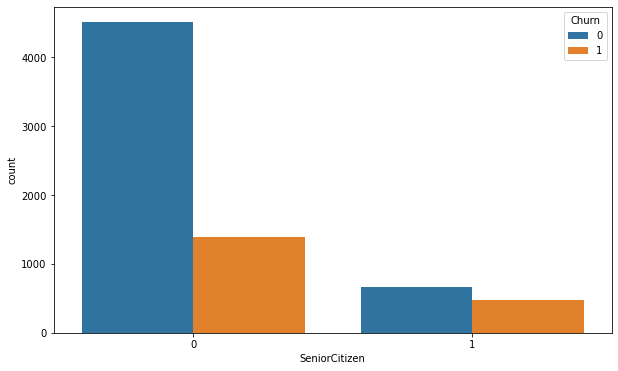

In [99]:
plt.figure(figsize=(10,6))
sns.countplot(x='SeniorCitizen', hue='Churn',data=df_clean)
plt.savefig('8a.png')
plt.show()

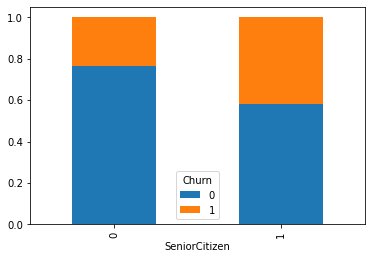

In [100]:
pd.crosstab(index=df_clean['SeniorCitizen'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.savefig('8b.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer tua memiliki kemungkinan churn lebih besar dibanding customer muda

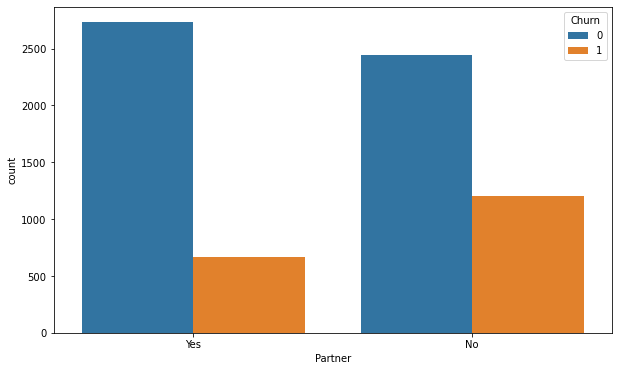

In [102]:
plt.figure(figsize=(10,6))
sns.countplot(x='Partner', hue='Churn',data=df_clean)
plt.savefig('9a.png')
plt.show()

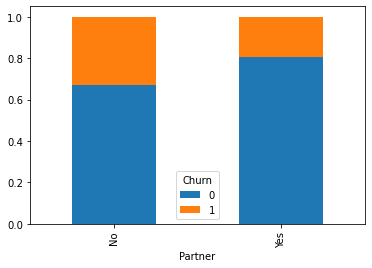

In [103]:
pd.crosstab(index=df_clean['Partner'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.savefig('9b.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang tidak memiliki pasangan memiliki kemungkinan churn lebih besar dibanding customer yang mempunyai pasangan

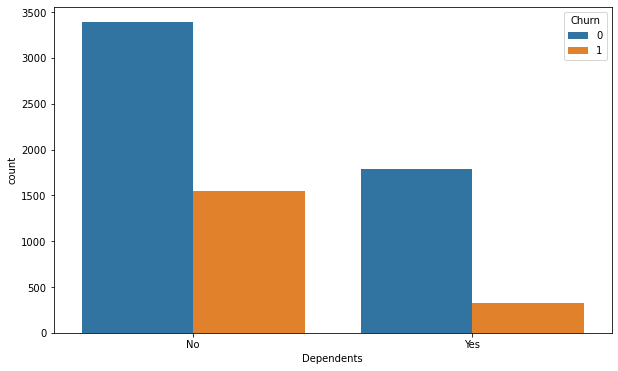

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(x='Dependents', hue='Churn',data=df_clean)
plt.savefig('10a.png')
plt.show()

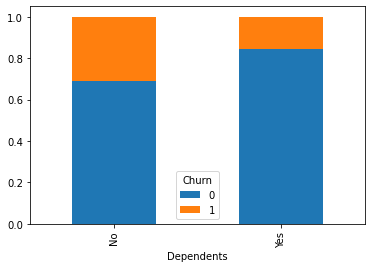

In [109]:
pd.crosstab(index=df_clean['Dependents'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.savefig('10b.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang tidak memiliki dependent memiliki kemungkinan churn lebih besar dibanding customer yang mempunyai dependent

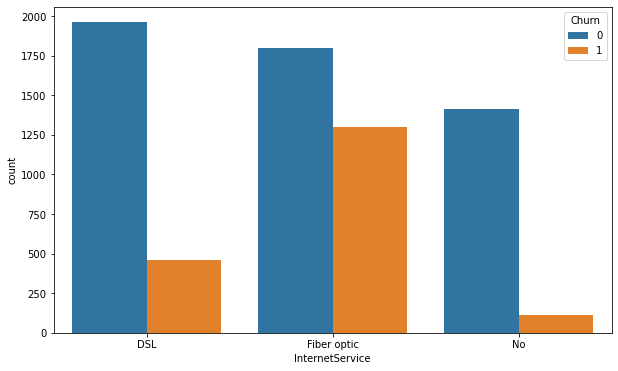

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(x='InternetService', hue='Churn',data=df_clean)
plt.savefig('11a.png')
plt.show()

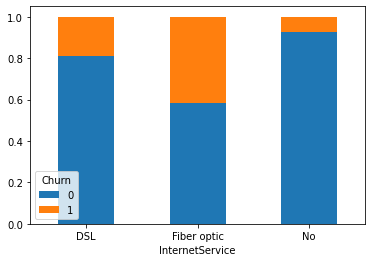

In [118]:
pd.crosstab(index=df_clean['InternetService'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.savefig('11c.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang menggunakan internet fiber optic memiliki kemungkinan churn lebih besar dibanding customer yang menggunakan internet DSL dan tidak menggunakan layanan internet

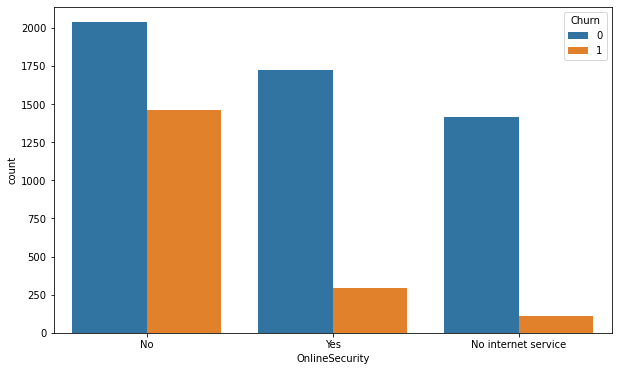

In [112]:
plt.figure(figsize=(10,6))
sns.countplot(x='OnlineSecurity', hue='Churn',data=df_clean)
plt.savefig('12a.png')
plt.show()

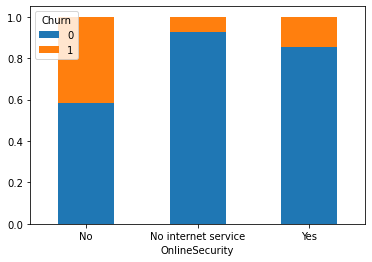

In [119]:
pd.crosstab(index=df_clean['OnlineSecurity'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.savefig('12c.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang tidak menggunakan online security memiliki kemungkinan churn lebih besar dibanding customer yang menggunakan online security dan tidak menggunakan layanan internet

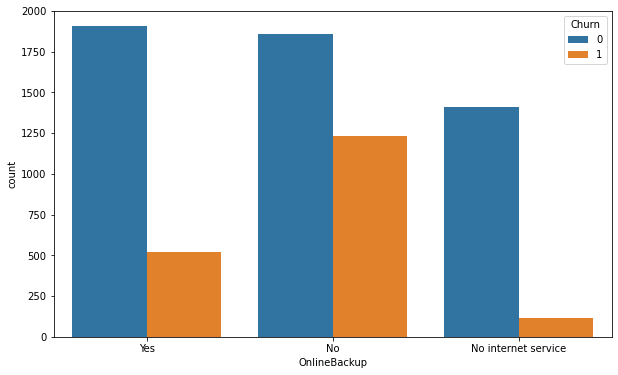

In [114]:
plt.figure(figsize=(10,6))
sns.countplot(x='OnlineBackup', hue='Churn',data=df_clean)
plt.savefig('13a.png')
plt.show()

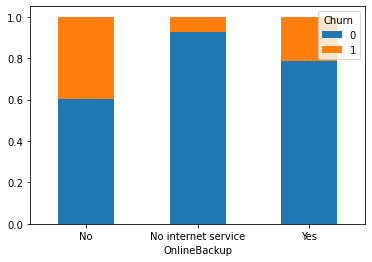

In [120]:
pd.crosstab(index=df_clean['OnlineBackup'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.savefig('13c.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang tidak menggunakan online backup memiliki kemungkinan churn lebih besar dibanding customer yang menggunakan online backup dan tidak menggunakan layanan internet

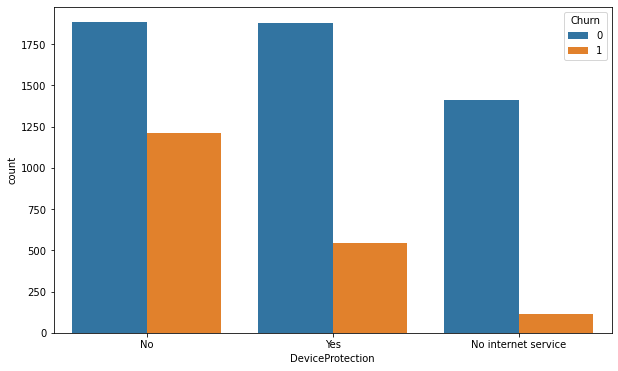

In [121]:
plt.figure(figsize=(10,6))
sns.countplot(x='DeviceProtection', hue='Churn',data=df_clean)
plt.savefig('14a.png')
plt.show()

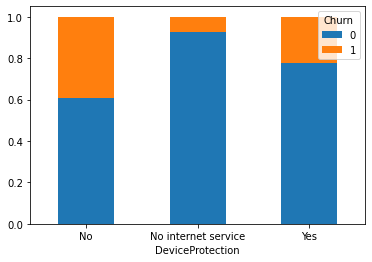

In [122]:
pd.crosstab(index=df_clean['DeviceProtection'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.savefig('14b.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang tidak menggunakan device protection memiliki kemungkinan churn lebih besar dibanding customer yang menggunakan device protection dan tidak menggunakan layanan internet

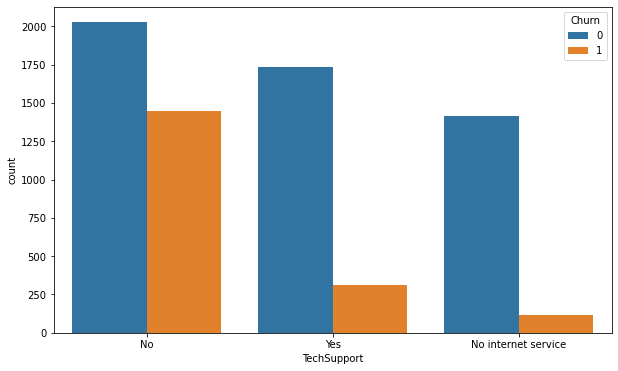

In [123]:
plt.figure(figsize=(10,6))
sns.countplot(x='TechSupport', hue='Churn',data=df_clean)
plt.savefig('15a.png')
plt.show()

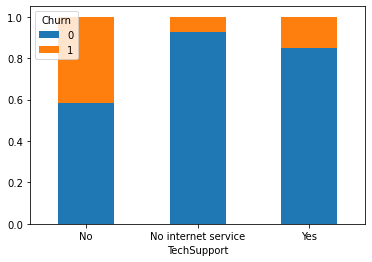

In [124]:
pd.crosstab(index=df_clean['TechSupport'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.savefig('15b.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang tidak menggunakan tech support memiliki kemungkinan churn lebih besar dibanding customer yang menggunakan tech support dan tidak menggunakan layanan internet

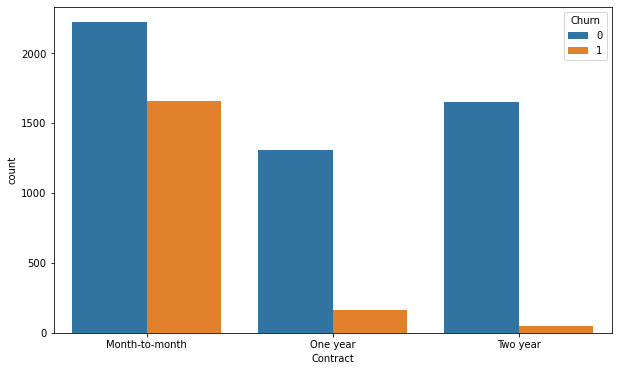

In [125]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract', hue='Churn',data=df_clean)
plt.savefig('16a.png')
plt.show()

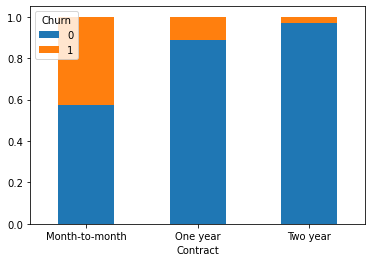

In [126]:
pd.crosstab(index=df_clean['Contract'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.savefig('16b.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang berlangganan per bulan memiliki kemungkinan churn lebih besar dibanding customer yang berlangganan per tahun dan berlangganan per 2 tahun

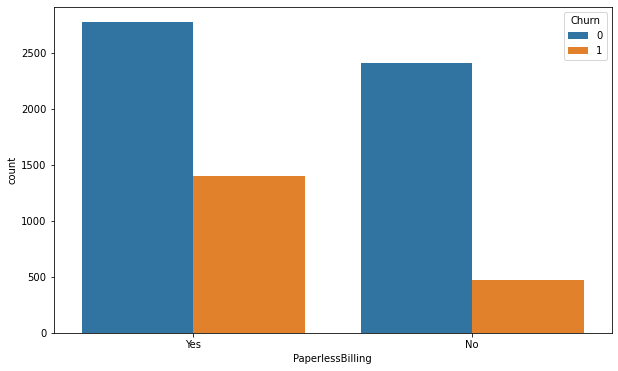

In [127]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaperlessBilling', hue='Churn',data=df_clean)
plt.savefig('17a.png')
plt.show()

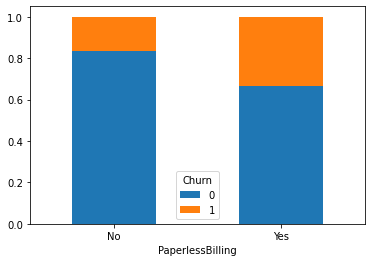

In [128]:
pd.crosstab(index=df_clean['PaperlessBilling'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.savefig('17b.png')
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang menggunakan paperless billing memiliki kemungkinan churn lebih besar dibanding customer yang tidak menggunakan paperless billing

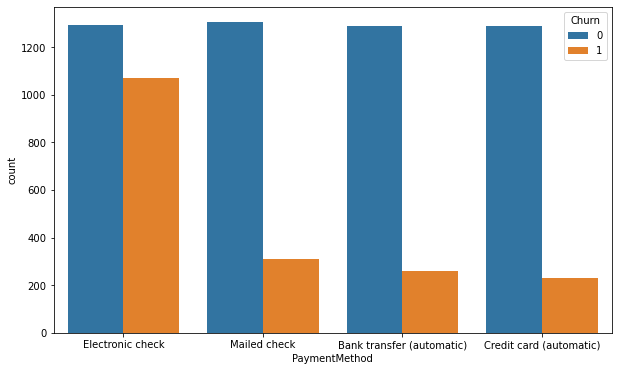

In [129]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn',data=df_clean)
plt.show()

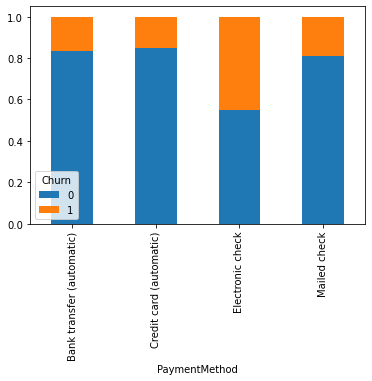

In [141]:
pd.crosstab(index=df_clean['PaymentMethod'], columns=df_clean['Churn'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

### Dari plot diatas dapat dilihat bahwa Customer yang menggunakan metode pembayaran electronic check memiliki kemungkinan churn lebih besar dibanding customer yang tidak menggunakan metode pembayaran electronic check